In [1]:
#!conda install -c glemaitre imbalanced-learn
#!sudo pip3 install imblearn
#!pip install imblearn  
#!pip install umap-learn
#!pip install eli5
#!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder,PowerTransformer,MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.compose import make_column_transformer
#import category_encoders as ce
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Introduction:
##### A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment.

##### This dataset designed to understand the factors that lead a person to leave current job. We will conduct Exploratory Data Analysis (EDA) to better understand the features in our dataset then we will apply MLP  and Perceptron Models  to predict whether the person wold join the company after traing or look for a new employment.



### Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate (To Data Science)
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [3]:
df_train=pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_train.csv")

df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
print(df_train.shape)
print(df_train['relevent_experience'].unique())
print(df_train['enrolled_university'].unique())
print(df_train['education_level'].unique())
print(df_train['major_discipline'].unique())
print(df_train['experience'].unique())
print(df_train['company_size'].unique())
print(df_train['company_type'].unique())
print(df_train['last_new_job'].unique())

(19158, 14)
['Has relevent experience' 'No relevent experience']
['no_enrollment' 'Full time course' nan 'Part time course']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
['1' '>4' 'never' '4' '3' '2' nan]


In [6]:
df_train['company_size'] = df_train['company_size'].replace('10/49', '10-49')
df_train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [7]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


#**1. Exploratory Data Analysis**

### 1.1 Understading Our Dataset

### We can see that our dataset contains 19158 entries and 14 columns. We have 4 numerical variables and 10 categorical variables


In [8]:
print(df_train.shape)
print(df_train.columns.to_list())

(19158, 14)
['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


###  1.2 Missing values

#### Number of rows contains at least one missing value

In [9]:
x = df_train.dropna()
total = df_train.shape[0]
missing = x.shape[0]
print('Number of rows:' ,  missing )
print('Percentage of rows that contains missing values:', (missing ) *100 / total )

Number of rows: 8955
Percentage of rows that contains missing values: 46.74287503914814


#### The percentage of rows that contains missing values is very high so we can not drop these rows.
#### The next table will display the missing value in each column and their percentage.

In [10]:
null = pd.DataFrame({'No of null values':df_train.isnull().sum(),'Percentage of null values':df_train.isnull().sum()*100/df_train.shape[0]})
null

,No of null values,Percentage of null values
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


#### Columns that contain missing values


In [11]:
null[null['No of null values'] > 0]

,No of null values,Percentage of null values
gender,4508,23.530640
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885
company_type,6140,32.049274
last_new_job,423,2.207955


#### We are not interested in enrollee_id so we will drop it

In [12]:
df_train.drop(['enrollee_id'], axis = 1, inplace=True)
df_train.shape

(19158, 13)

### 1.3 Distribution of Variables

## Target


### Target has 2 values:
###### 0 - people who want to a job change
###### 1 - people who donot want to a job change

0.0    14381
1.0     4777
Name: target, dtype: int64


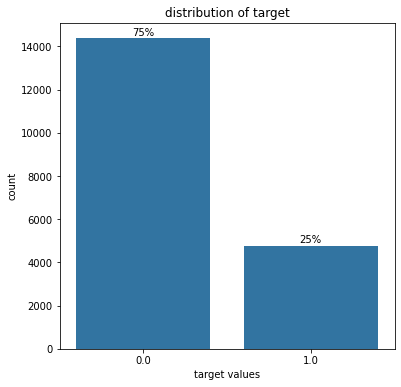

In [13]:
count = df_train.target.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(df_train.target,color = sb.color_palette()[0]);
plt.title('distribution of target');
plt.xlabel('target values');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /df_train.target.count()))+'%',
              ha='center',
              va = 'top')
    

#### We can notice that the data is imbalanced

## Training hours

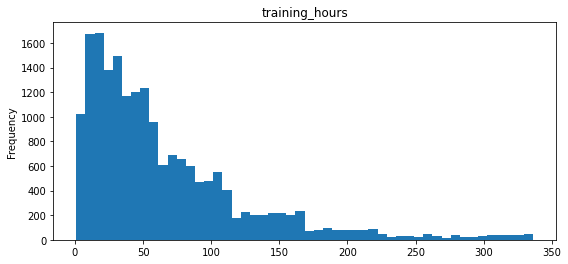

In [14]:
plt.figure(figsize=(9,4))
plt.hist(df_train["training_hours"], color= sb.color_palette()[0] ,bins=50)
plt.ylabel("Frequency")
plt.title('training_hours')
plt.show()

#### The distribution of training hours is highly skewed to the right

<AxesSubplot:>

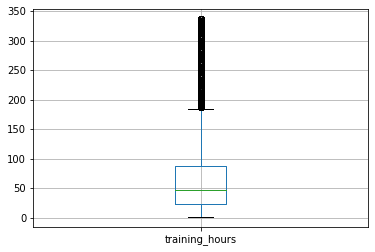

In [15]:
df_train[['training_hours']].boxplot()

In [16]:
IQR = df_train[['training_hours']].quantile(0.75) - df_train[['training_hours']].quantile(0.25)


lower_boundary = df_train[['training_hours']].quantile(0.25) - (IQR * 1.5)
upper_boundary = df_train[['training_hours']].quantile(0.75) + (IQR * 1.5)
print('city_development_index Lower outliers = ',df_train.loc[(df_train['training_hours']<lower_boundary[0])].shape[0])
print('city_development_index Upper outliers = ',df_train.loc[(df_train['training_hours']>upper_boundary[0])].shape[0])

city_development_index Lower outliers =  0
city_development_index Upper outliers =  984


## City development index

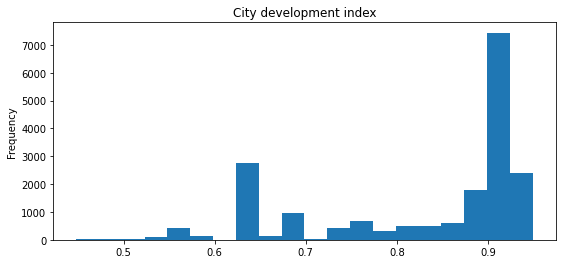

In [17]:
plt.figure(figsize=(9,4))
plt.hist(df_train["city_development_index"], color= sb.color_palette()[0] ,bins=20)
plt.ylabel("Frequency")
plt.title('City development index')
plt.show()

#### We need to transform city development index before applying the model

<AxesSubplot:>

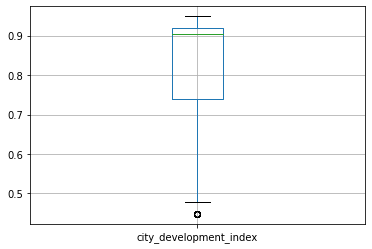

In [18]:
df_train[['city_development_index']].boxplot()

### Transform 'city_development_index'

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

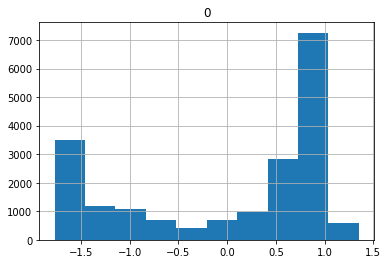

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
pt.fit(df_train['city_development_index'].values.reshape(-1,1))
tr = pt.transform(df_train['city_development_index'].values.reshape(-1,1))
df_train['city_development_index'] = pd.DataFrame(tr)
pd.DataFrame(tr).hist()

#pt = PowerTransformer(method='box-cox')
#pt.fit(df_train['training_hours'].values.reshape(-1,1))
#tr = pt.transform(df_train['training_hours'].values.reshape(-1,1))
#df_train['training_hours'] = pd.DataFrame(tr)
#pd.DataFrame(tr).hist()

* We tried to use Box-Cox to transform the continues columns which are 'city_development_index' and 'training_hours' but the accuracy decreased.

<AxesSubplot:>

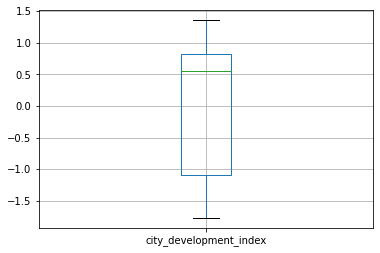

In [20]:
df_train[['city_development_index']].boxplot()

In [21]:
IQR = df_train[['city_development_index']].quantile(0.75) - df_train[['city_development_index']].quantile(0.25)

lower_boundary_1 = df_train[['city_development_index']].quantile(0.25) - (IQR * 1.5)
upper_boundary_1 = df_train[['city_development_index']].quantile(0.75) + (IQR * 1.5)
#df=np.where(df_train[['city_development_index']] > upper_boundary, upper_boundary,
#np.where(df_train[['city_development_index']] <lower_boundary, lower_boundary,df_train[['city_development_index']]))
print('city_development_index Lower outliers = ',df_train.loc[(df_train['city_development_index']<lower_boundary_1[0])].shape[0])
print('city_development_index Upper outliers = ',df_train.loc[(df_train['city_development_index']>upper_boundary_1[0])].shape[0])

city_development_index Lower outliers =  0
city_development_index Upper outliers =  0


In [22]:
#df_train.loc[(df_train['city_development_index']<lower_boundary[0]),['city_development_index']]=lower_boundary[0]
#df_train.drop(df_train.loc[(df_train['training_hours']>upper_boundary[0])].index,axis=0,inplace=True)

* We tried to drop the outliers in the 'city_development_index' and 'training_hours' columns but the accuracy decreased so we didn't drop the outliers.

## Gender

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


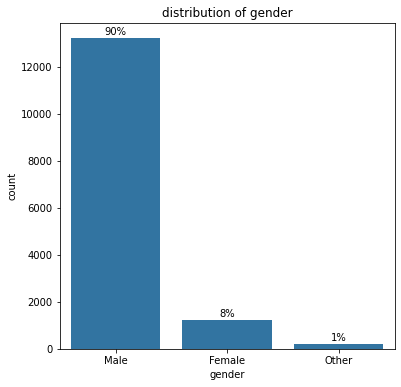

In [23]:
df=pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_train.csv")
count = df.gender.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(df.gender,color = sb.color_palette()[0]);
plt.title('distribution of gender');
plt.xlabel('gender');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] / df.gender.count()))+'%',
              ha='center',
              va = 'top')
    

## Relevant Experience


Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


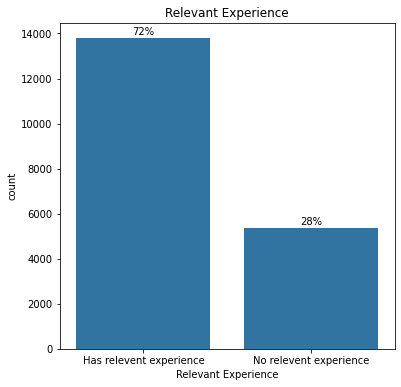

In [24]:
count = df.relevent_experience.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(df.relevent_experience,color = sb.color_palette()[0]);
plt.title('Relevant Experience');
plt.xlabel('Relevant Experience');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] / df.relevent_experience.count()))+'%',
              ha='center',
              va = 'top')

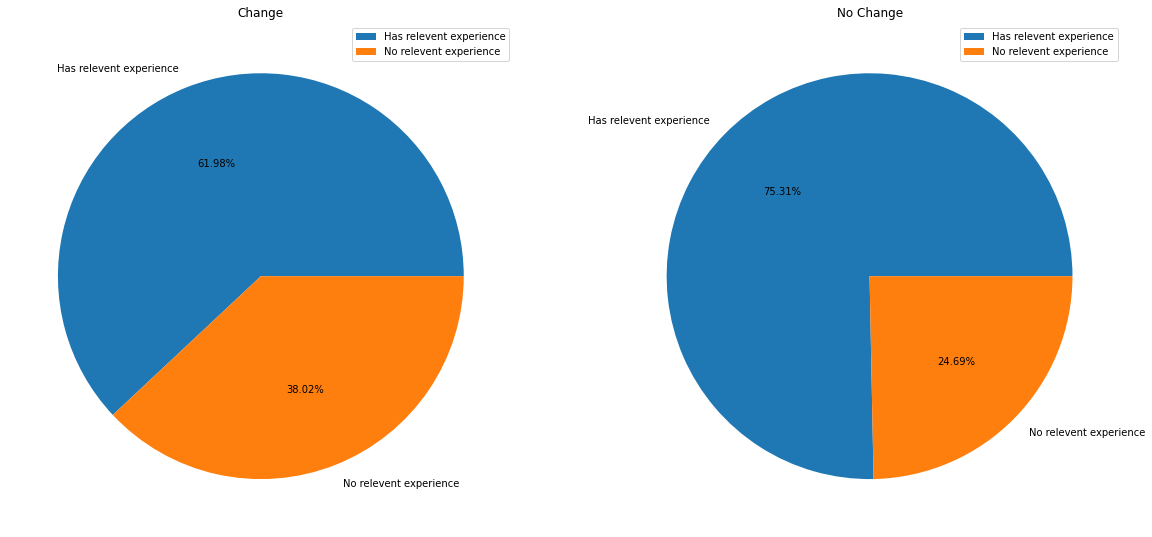

In [25]:
change = df[df.target == 1].relevent_experience.value_counts()
no_change = df[df.target == 0].relevent_experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

## Education Level

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


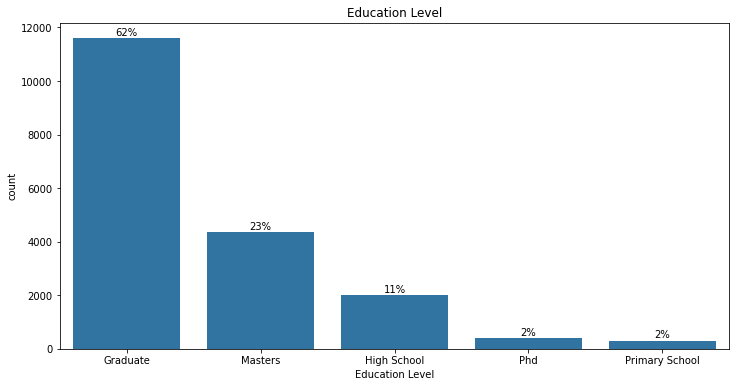

In [26]:
count = df.education_level.value_counts()
print( count )
plt.figure(figsize=(12,6))
sb.countplot(df.education_level,color = sb.color_palette()[0]);
plt.title('Education Level');
plt.xlabel('Education Level');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 400,
            str(round(100*count[i] / df.education_level.count()))+'%',
              ha='center',
              va = 'top')

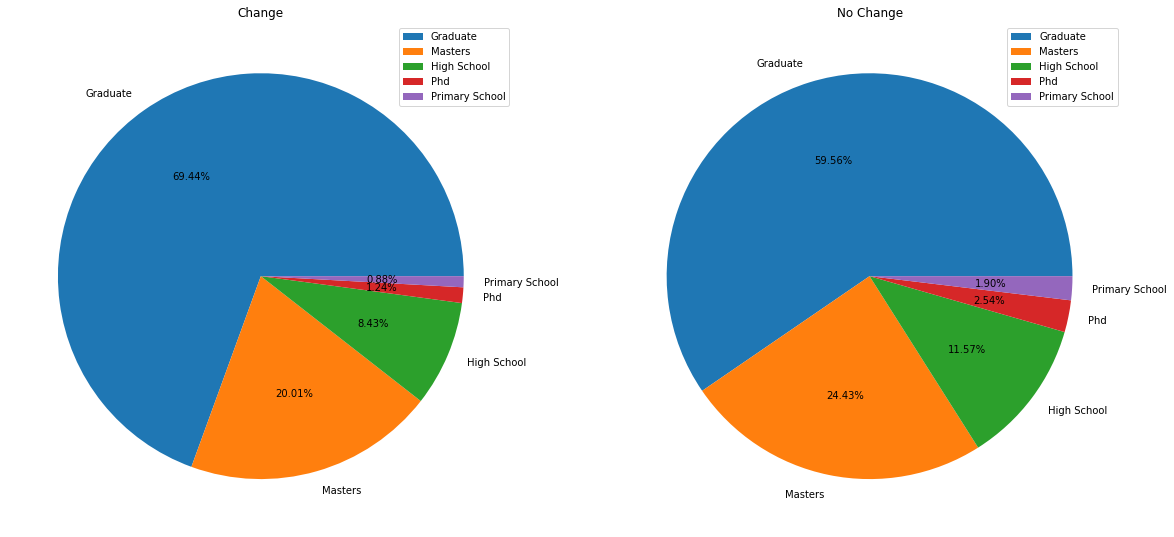

In [27]:
change = df[df.target == 1].education_level.value_counts()
no_change = df[df.target == 0].education_level.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

## Major Discipline

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


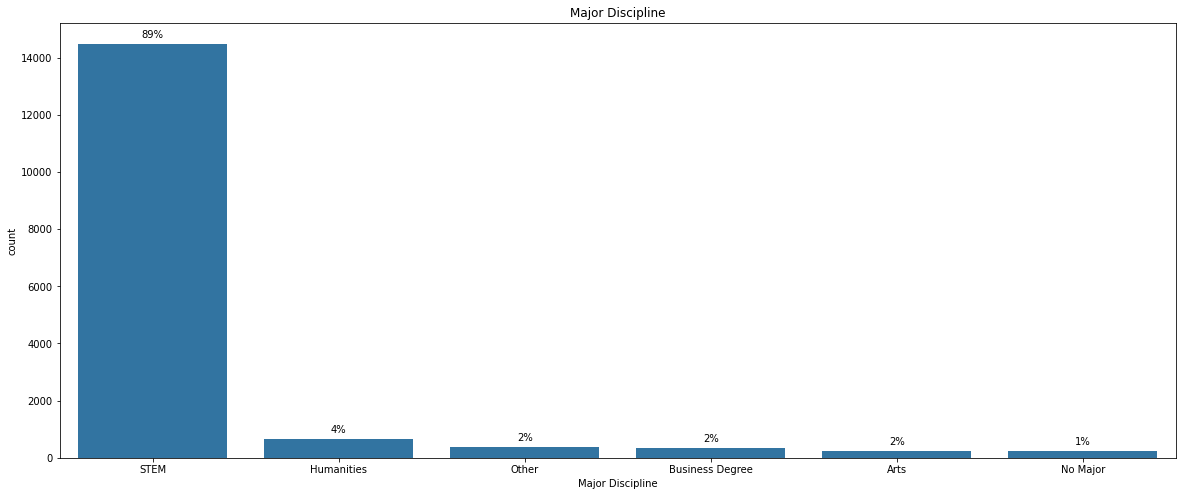

In [28]:
count = df.major_discipline.value_counts()
print( count )
order = count.index
plt.figure(figsize=(20,8))
sb.countplot(df.major_discipline ,color = sb.color_palette()[0],order=order);
plt.title('Major Discipline');
plt.xlabel('Major Discipline');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] / df.major_discipline.count()))+'%',
              ha='center',
              va = 'top')

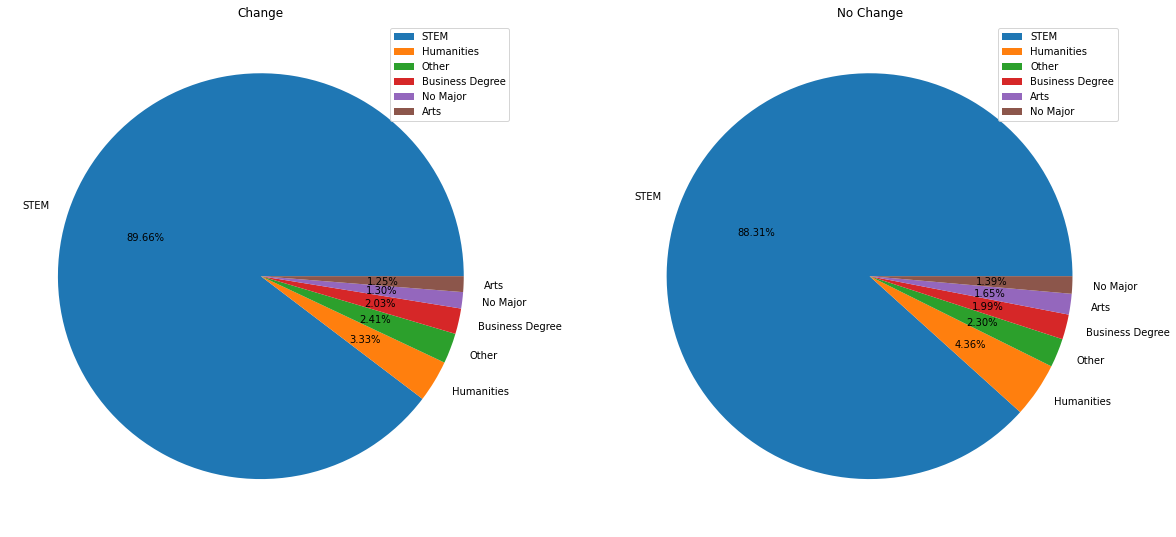

In [29]:
change = df[df.target == 1].major_discipline.value_counts()
no_change = df[df.target == 0].major_discipline.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

## Experience

In [30]:
df_train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

#### *There are lots of categories so we will transform them into 6 categories*

In [31]:
df_train['experience'].replace({'1':'1-5',
                                '2':'1-5',
                                '3':'1-5',
                                '4':'1-5',
                                '5':'1-5',
                                '6':'6-10',
                                '7':'6-10',
                                '8':'6-10',
                                '9':'6-10',
                                '10':'6-10',
                                '11':'11-15',
                                '12':'11-15',
                                '13':'11-15',
                                '14':'11-15',
                                '15':'11-15',
                                '16':'16-20',
                                '17':'16-20',
                                '18':'16-20',
                                '19':'16-20',
                                '20':'16-20'},inplace=True)

In [32]:
count = df_train.experience.value_counts()
count

1-5      5863
6-10     5011
>20      3286
11-15    2829
16-20    1582
<1        522
Name: experience, dtype: int64

1-5      5863
6-10     5011
>20      3286
11-15    2829
16-20    1582
<1        522
Name: experience, dtype: int64


Text(5, 3486, '17%')

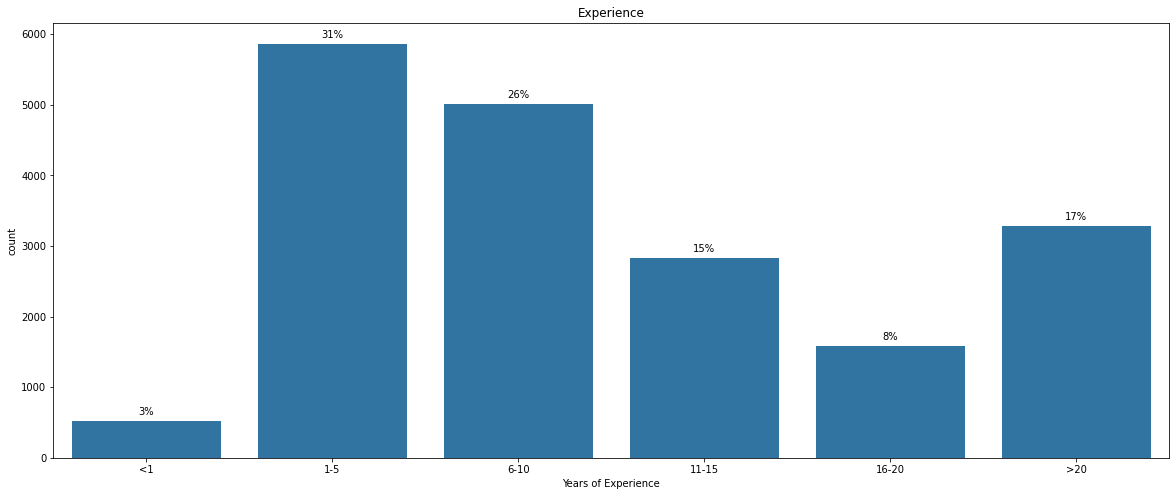

In [33]:
count = df_train.experience.value_counts()
print( count )
plt.figure(figsize=(20,8))
order=['<1','1-5','6-10','11-15','16-20','>20' ]
sb.countplot(df_train.experience ,color = sb.color_palette()[0], order=order );
plt.title('Experience');
plt.xlabel('Years of Experience');
plt.ylabel('count');
plt.text( 0, count[5]+200 , str(round(100*count[5] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 1, count[0]+200 , str(round(100*count[0] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 2, count[1]+200 , str(round(100*count[1] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 3, count[3]+200 , str(round(100*count[3] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 4, count[4]+200 , str(round(100*count[4] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 5, count[2]+200 , str(round(100*count[2] / df.experience.count()))+'%', ha='center',va = 'top')

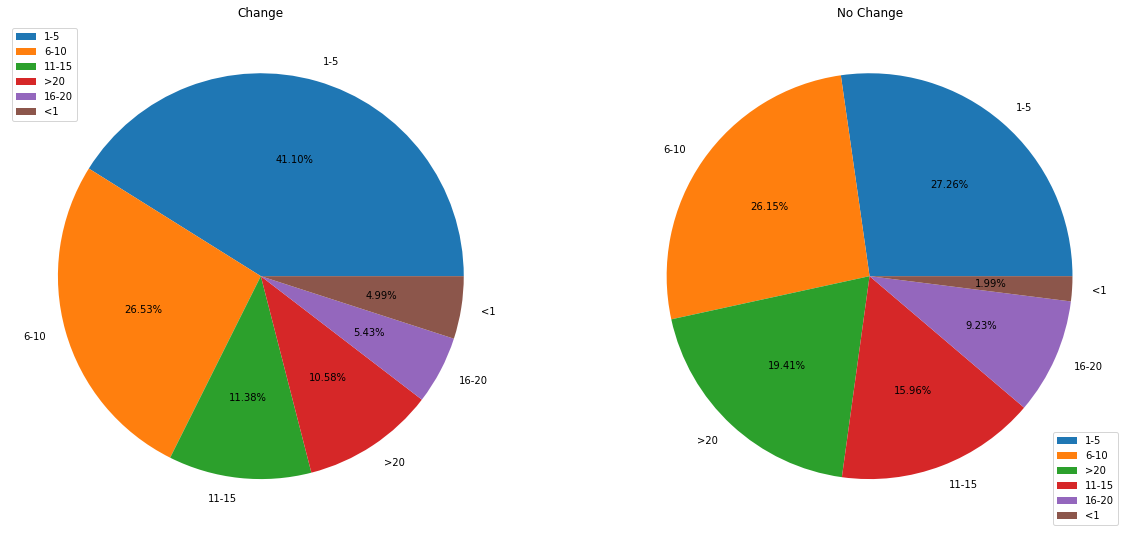

In [34]:
change = df_train[df_train.target == 1].experience.value_counts()
no_change = df_train[df_train.target == 0].experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

In [35]:
#df_train.loc[((df_train['education_level'] == 'Primary School')&(df_train['major_discipline'].isna())), ['major_discipline']] = 'No Major'
#df_train.loc[((df_train['education_level'] == 'High School')&(df_train['major_discipline'].isna())), ['major_discipline']] = 'No Major'

In [36]:
#df_train['gender'].fillna('Male',inplace=True)
#df_train.head()

In [37]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(df_train['gender'].values.reshape(-1,1))
#gender = enc.transform(df_train['gender'].values.reshape(-1,1))

In [38]:
#one_hot = pd.get_dummies(df_train['gender'])
#df_train  = df_train.join(one_hot)
#df_train.head()

In [39]:
df_train.shape                                                                                                                                                                                                             

(19158, 13)

In [40]:
#df_train.dropna(subset=['last_new_job', 'experience', 'education_level', 'enrolled_university'],inplace=True)

### After trying to drop the nulls in 'last_new_job', 'experience', 'education_level' and 'enrolled_university' columns the model tended to overfit.

In [41]:
#df_train.drop(columns={'index'},inplace=True)

# 2. Data Preprocessing

### Encoding

In [42]:
df_train['city']=df_train['city'].apply(lambda x: x.strip('city_'))
df_train['city'] = df_train['city'].astype(int)

In [43]:
to_LabelEncode = df_train[['gender','relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']]

le = LabelEncoder()
df_temp = to_LabelEncode.astype("str").apply(le.fit_transform)
df_temp = df_temp.where(~to_LabelEncode.isna(), to_LabelEncode)

df_encod = df_temp.join(df_train[['city_development_index','training_hours','city']])

df_encod.shape

(19158, 12)

In [44]:
target = df_train['target']

In [45]:
df_encod.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city
0,1,0,3,0,5,5,NaN,NaN,0,0.821326,36,103
1,1,1,3,0,5,1,4,5,4,-0.848196,47,40
2,NaN,1,0,0,5,0,NaN,NaN,6,-1.543829,83,21
3,NaN,1,NaN,0,1,4,NaN,5,6,-0.749002,52,115
4,1,0,3,2,5,5,4,1,3,-0.912240,8,162



# Handling Null Values


### Various Approaches to Handle Missing values in Categorical Features 
- Drop columns having very large amount of null values
- Drop entire row if it has some null values (But this approach is not Recommendable because then we will lose lots of precious data)
- Fill nulls using statistics such as mean, mode and median
- With the help of machine learning algorithms (regression or classification), find missing values and impute them in data


## Used Approach: Filling Nulls using an imputer 

In [46]:
lr = LinearRegression()

mice_imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10,
                         n_nearest_features=2,skip_complete=True)
final_df = mice_imputer.fit_transform(df_encod)

final_df = pd.DataFrame(final_df)
print(final_df.shape)
final_df.columns = ['gender','relevent_experience', 'enrolled_university', 'education_level', 
                    'major_discipline','experience', 'company_size', 'company_type', 
                    'last_new_job','city_development_index','training_hours','city']


(19158, 12)


In [47]:
final_df = final_df.join(target)
final_df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city,target
0,1.000000,0.0,3.000000,0.0,5.0,5.0,3.070854,4.377558,0.0,0.821326,36.0,103.0,1.0
1,1.000000,1.0,3.000000,0.0,5.0,1.0,4.000000,5.000000,4.0,-0.848196,47.0,40.0,0.0
2,0.938402,1.0,0.000000,0.0,5.0,0.0,3.030476,4.051763,6.0,-1.543829,83.0,21.0,0.0
3,0.864566,1.0,1.381317,0.0,1.0,4.0,2.993103,5.000000,6.0,-0.749002,52.0,115.0,1.0
4,1.000000,0.0,3.000000,2.0,5.0,5.0,4.000000,1.000000,3.0,-0.912240,8.0,162.0,0.0


##Feature Correlation

<AxesSubplot:>

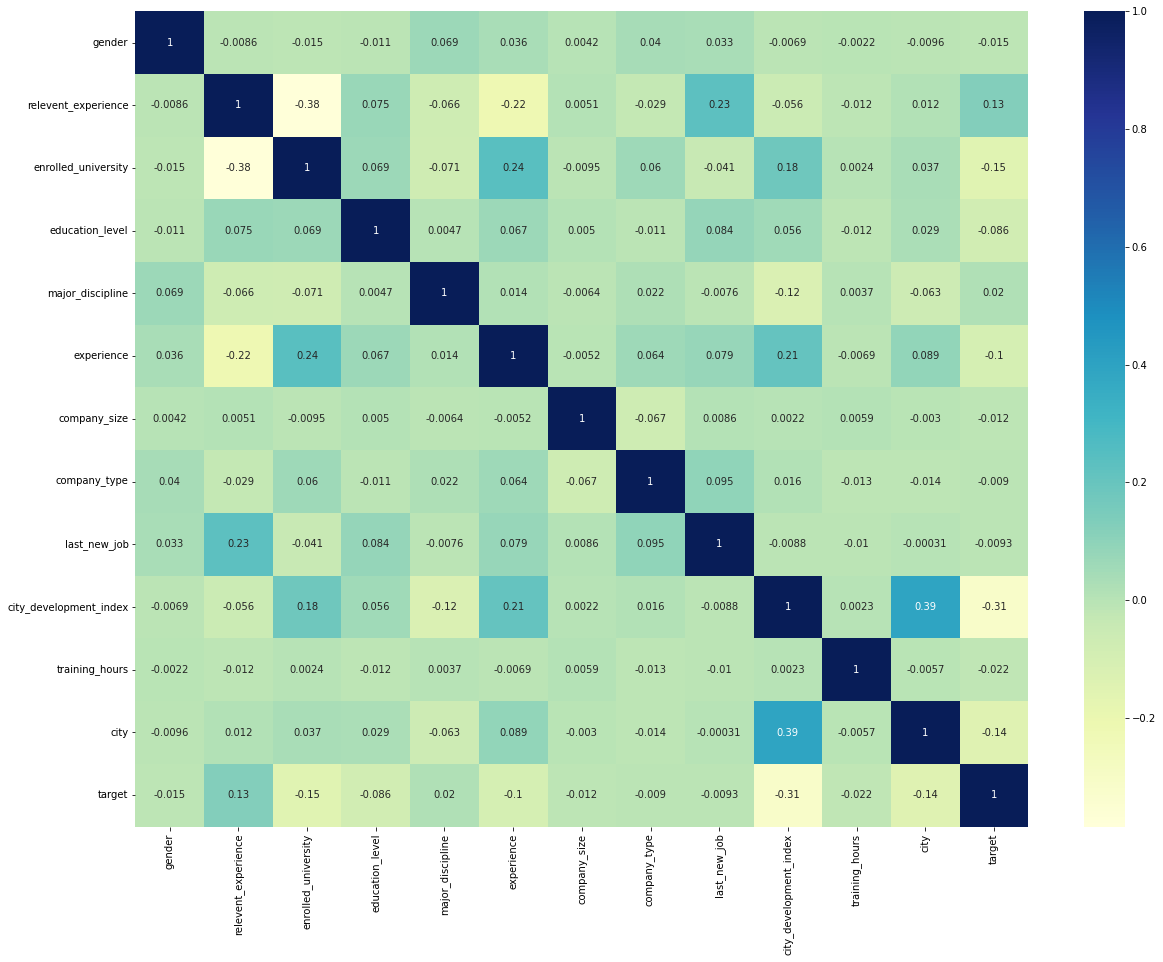

In [48]:
plt.subplots(figsize=(20,15))
sb.heatmap(final_df.corr(),annot_kws={"size": 10} ,annot=True,cmap='YlGnBu',)

### Apply One Hot Encoding to gender column

In [49]:
print(final_df['gender'].max())
final_df['gender']=(final_df['gender'].apply(np.ceil)).astype(int)
final_df['gender'].max()

2.0


2

In [50]:
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_df[['gender']]).toarray())

#merge one-hot encoded columns back with original DataFrame
encoder_df.columns = ['gender_f','gender_m','gender_oth']


final_df.drop(columns='gender',inplace=True)
final_df = pd.DataFrame(final_df.join(encoder_df))
#view final df
final_df.head()

,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city,target,gender_f,gender_m,gender_oth
0,0.0,3.000000,0.0,5.0,5.0,3.070854,4.377558,0.0,0.821326,36.0,103.0,1.0,0.0,1.0,0.0
1,1.0,3.000000,0.0,5.0,1.0,4.000000,5.000000,4.0,-0.848196,47.0,40.0,0.0,0.0,1.0,0.0
2,1.0,0.000000,0.0,5.0,0.0,3.030476,4.051763,6.0,-1.543829,83.0,21.0,0.0,0.0,1.0,0.0
3,1.0,1.381317,0.0,1.0,4.0,2.993103,5.000000,6.0,-0.749002,52.0,115.0,1.0,0.0,1.0,0.0
4,0.0,3.000000,2.0,5.0,5.0,4.000000,1.000000,3.0,-0.912240,8.0,162.0,0.0,0.0,1.0,0.0


### Trying binary encoding for company_type and company_size columns but we got bad accuracy

In [51]:
# print(final_df['company_type'].max())
# final_df['company_type']=(final_df['company_type'].apply(np.ceil)).astype(int)
# #final_df.gender=np.where(final_df.gender>0.5,1,0)
# final_df['company_type'].max()

In [52]:
# be=ce.BinaryEncoder()
# l=pd.DataFrame(be.fit_transform(final_df["company_type"].apply(str)))
# final_df= pd.concat([final_df,l],axis=1)
# final_df.drop(columns='company_type',inplace=True)

### Correlation after Filling Nulls

<AxesSubplot:>

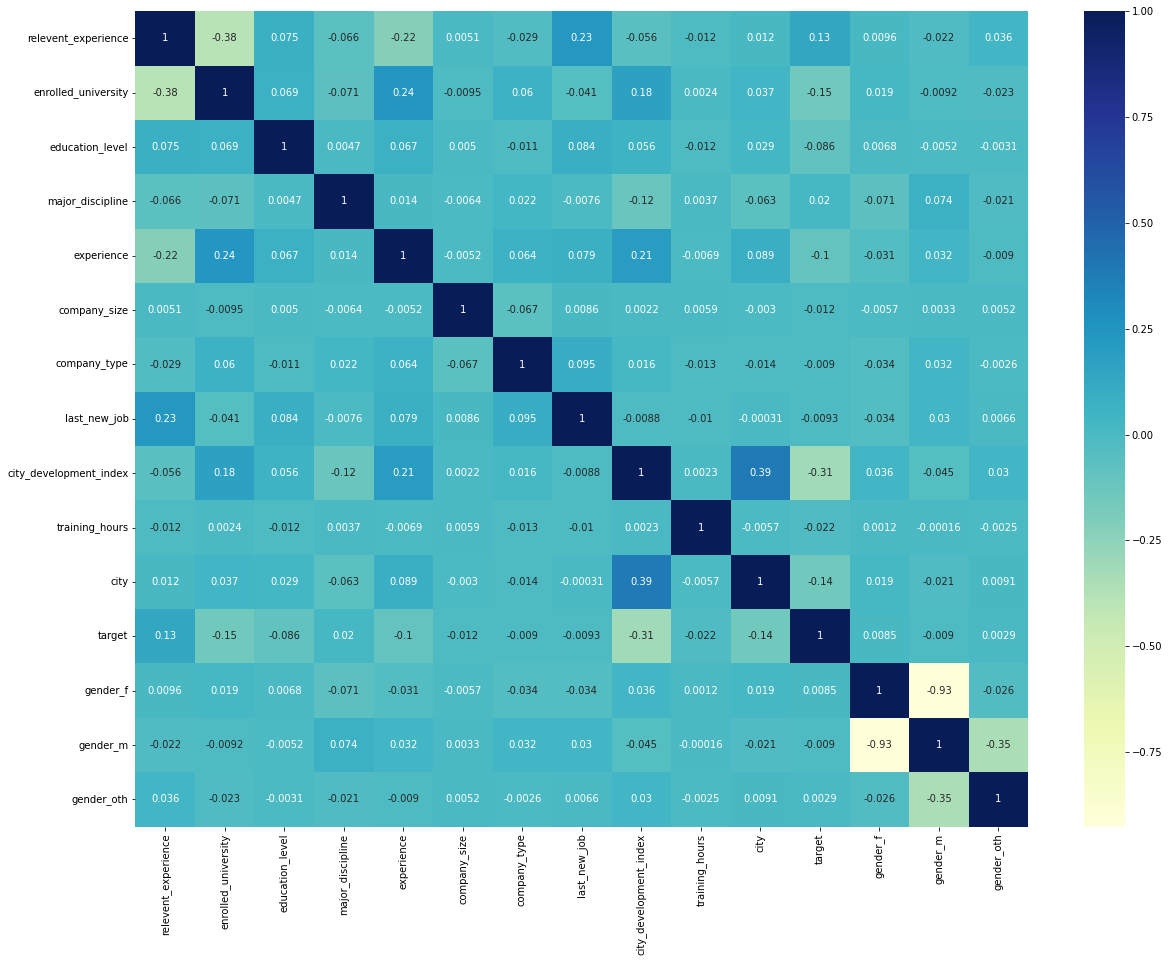

In [53]:
plt.subplots(figsize=(20,15))
sb.heatmap(final_df.corr(),annot_kws={"size": 10} ,annot=True,cmap='YlGnBu',)

## Checking for imbalance

0.0    14381
1.0     4777
Name: target, dtype: int64


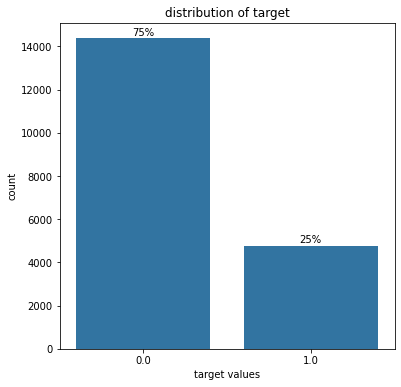

In [54]:
count = final_df.target.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(final_df.target,color = sb.color_palette()[0]);
plt.title('distribution of target');
plt.xlabel('target values');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /final_df.target.count()))+'%',
              ha='center',
              va = 'top')
    

#### *There is a huge imbalance in data so we should handle it by using an oversampling technique*

# Oversampling using SMOTE


Synthetic Minority Oversampling Technique
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.


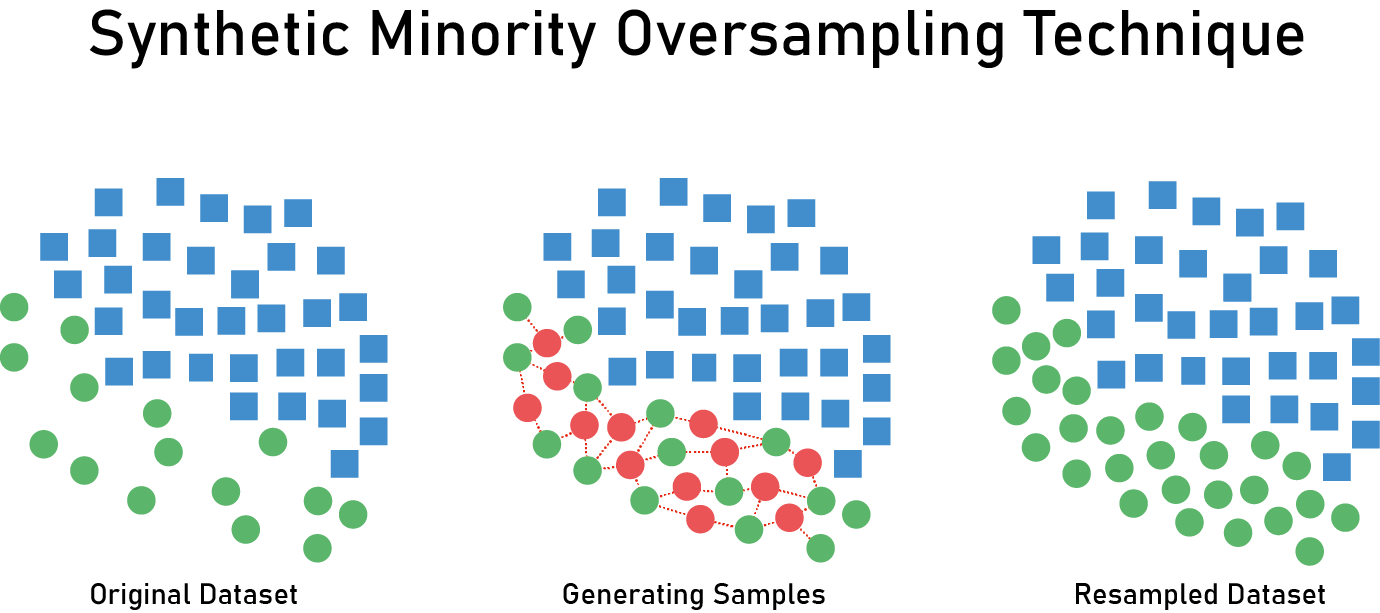

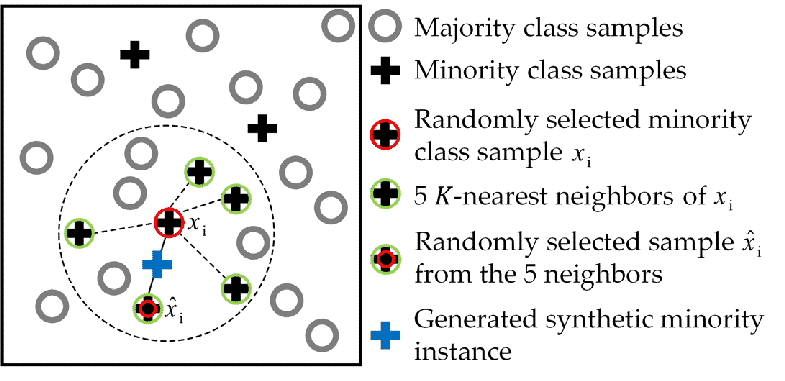

In [55]:
y_true = final_df["target"]
final_df["target"].value_counts(normalize=True)
X = final_df.drop('target',1)
y = final_df.target


svm_smote = SMOTE( random_state=42,k_neighbors=5) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y)

X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.3, random_state=42)



### Standardizing Data (Z score)



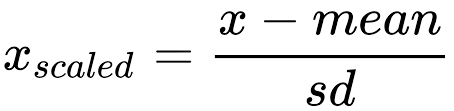

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_svm)

X_test = sc.transform(X_test_svm)
print("Number of data points in train data :",X_train.shape)
print("Number of data points in validation data :",X_test.shape)
print(X_train.mean())

Number of data points in train data : (20133, 14)
Number of data points in validation data : (8629, 14)
-1.2049848070805141e-17


### MinMax normalization-> decreased accuracy 

In [57]:
# mima=MinMaxScaler()
# X_train = mima.fit_transform(X_train_svm)
# X_test = mima.transform(X_test_svm)

## Data After oversampling





1.0    14381
0.0    14381
Name: target, dtype: int64


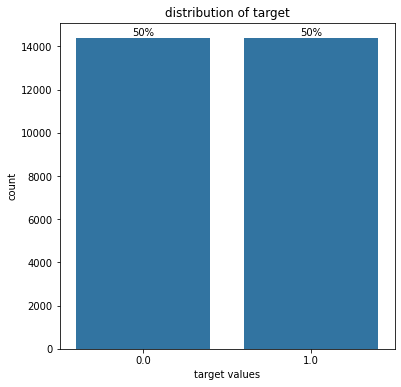

In [58]:
count = y_svm_smote.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(y_svm_smote,color = sb.color_palette()[0]);
plt.title('distribution of target');
plt.xlabel('target values');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /y_svm_smote.count()))+'%',
              ha='center',
              va = 'top')
    

In [59]:


print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",round(int(train_distr[0])*100/train_len,2),"Class 1: ", round(int(train_distr[1])*100/train_len,2))

print("-"*10, "Distribution of output variable in validation data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",round(int(test_distr[0])*100/test_len,2), "Class 1: ",round(int(test_distr[1])*100/test_len,2))

---------- Distribution of output variable in train data ----------
Class 0:  49.95 Class 1:  50.05
---------- Distribution of output variable in validation data ----------
Class 0:  50.12 Class 1:  49.88


In [60]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (20133, 14)
X_test (8629, 14)
y_train (20133,)
y_test (8629,)


## Plotting the data using PCA

### Train Data

<AxesSubplot:xlabel='0', ylabel='1'>

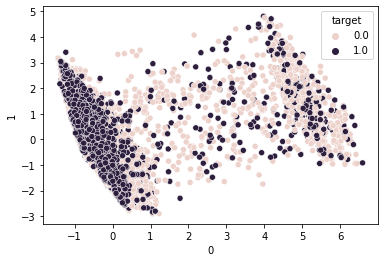

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x2_train=pd.DataFrame(pca.fit_transform(X_train))
x2_train.head()
sb.scatterplot(x2_train[0],x2_train[1],hue=y_train)

### Test Data

<AxesSubplot:xlabel='0', ylabel='1'>

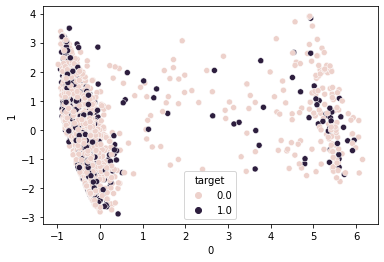

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x2_test=pd.DataFrame(pca.fit_transform(X_test))
x2_test.head()
sb.scatterplot(x2_test[0],x2_test[1],hue=y_test)

### Trying another ploting Technique **(UMAP)**
#### Better visualization than PCA

### Train Data

In [63]:
from umap import UMAP
features =X_train

umap_2d = UMAP(n_components=2, init='random', random_state=42)
umap_3d = UMAP(n_components=3, init='random', random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y_train, labels={'color': 'Target'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=y_train, labels={'color': 'Target'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

###Test Data

In [64]:
from umap import UMAP
features =X_test

umap_2d = UMAP(n_components=2, init='random', random_state=42)
umap_3d = UMAP(n_components=3, init='random', random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y_test, labels={'color': 'Target'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=y_test, labels={'color': 'Target'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

## 3.**Models**


## 3.1 MLP



A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). 

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

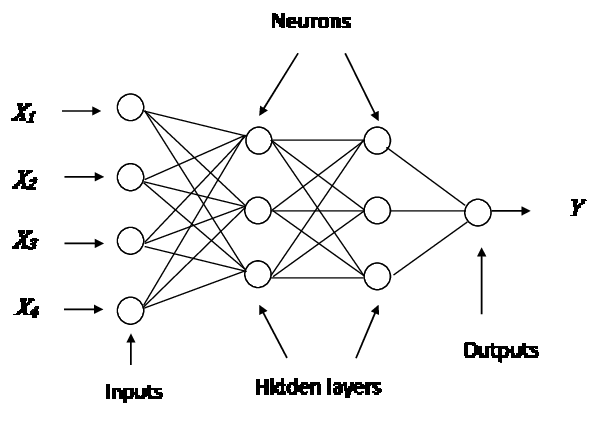

#### Random search to get the best hyperparameters

In [65]:
#parameter_space = {
    #hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#    'solver':['lbfgs', 'sgd', 'adam'],
#'activation':['identity', 'logistic', 'tanh', 'relu'],
#'learning_rate':['constant', 'invscaling', 'adaptive'],
#'learning_rate_init':np.arange(0,0.15,0.001),
#'hidden_layer_sizes': [(20,50,80), (20,50,80), (20,50,80)]
   
#}


#mlp = MLPClassifier(random_state=42)
#clf = RandomizedSearchCV(estimator=mlp,param_distributions=parameter_space)
#bm = clf.fit(X_train,y_train)



#mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)

In [66]:
#print(bm.best_params_)

In [67]:
mlp = MLPClassifier(learning_rate_init=0.0256,hidden_layer_sizes=(80,100,80),
                    activation='relu',solver='adam',random_state=42,verbose=True,
                    max_iter=440)



mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
y_pred = mlp.predict(X_test)
fscore_train = f1_score(y_train,predict_train)
fscore_test = f1_score(y_test,y_pred)
acc_train = accuracy_score(predict_train, y_train)
acc_test = accuracy_score(y_pred, y_test)


Iteration 1, loss = 0.58076433
Iteration 2, loss = 0.52943495
Iteration 3, loss = 0.51260583
Iteration 4, loss = 0.49162380
Iteration 5, loss = 0.47873244
Iteration 6, loss = 0.47032918
Iteration 7, loss = 0.47503407
Iteration 8, loss = 0.46288733
Iteration 9, loss = 0.45946149
Iteration 10, loss = 0.45365341
Iteration 11, loss = 0.45784533
Iteration 12, loss = 0.45399903
Iteration 13, loss = 0.44906736
Iteration 14, loss = 0.44442483
Iteration 15, loss = 0.44129652
Iteration 16, loss = 0.44452136
Iteration 17, loss = 0.43947405
Iteration 18, loss = 0.43304309
Iteration 19, loss = 0.43208919
Iteration 20, loss = 0.43128127
Iteration 21, loss = 0.43196569
Iteration 22, loss = 0.42655297
Iteration 23, loss = 0.42643054
Iteration 24, loss = 0.42144014
Iteration 25, loss = 0.42312796
Iteration 26, loss = 0.41849401
Iteration 27, loss = 0.41437371
Iteration 28, loss = 0.41412225
Iteration 29, loss = 0.41638986
Iteration 30, loss = 0.41444418
Iteration 31, loss = 0.41860910
Iteration 32, los

## Evaluation Metrics

In [68]:
print("RESULTS :")
print("F1 Train ",fscore_train)
print("F1 Test : ",fscore_test)
print('###############################')
print("Acc Train ",acc_train)
print("Acc Test : ",acc_test)
print(classification_report(y_test,y_pred))
print('\n')
print(predict_train)

RESULTS :
F1 Train  0.8567941018504955
F1 Test :  0.8100399315459212
###############################
Acc Train  0.8543187801122535
Acc Test :  0.8070460076486268
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      4325
         1.0       0.80      0.82      0.81      4304

    accuracy                           0.81      8629
   macro avg       0.81      0.81      0.81      8629
weighted avg       0.81      0.81      0.81      8629



[0. 0. 1. ... 1. 0. 1.]


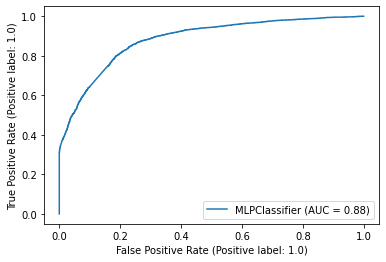

In [69]:
metrics.plot_roc_curve(mlp, X_test, y_test) 
plt.show()

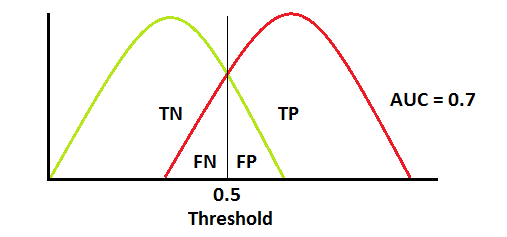

[[3414  911]
 [ 754 3550]]


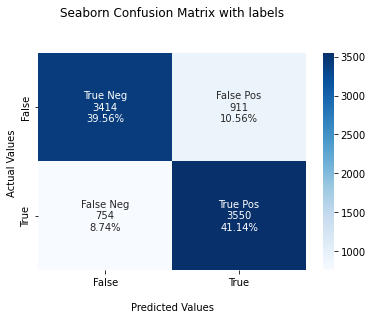

In [70]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Feature Importance 

In [71]:
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance

pimp = PermutationImportance(estimator = mlp, 
                                         scoring = 'f1', random_state=42, n_iter = 5)
pimp.fit(X_test, y_test);

print(eli5.show_weights(pimp, feature_names = X.columns.to_list()))

feature_imp = pd.DataFrame(np.hstack((np.array([X.columns[0:]]).T, 
                              pimp.feature_importances_.T.reshape(-1,1))), 
                              columns=['feature', 'importance'])

feature_imp['importance'] = pd.to_numeric(feature_imp['importance'])
feature_imp.sort_values(by='importance', ascending=False)

<IPython.core.display.HTML object>


,feature,importance
8,city_development_index,0.125201
6,company_type,0.102188
0,relevent_experience,0.060786
10,city,0.057921
5,company_size,0.037016
12,gender_m,0.026631
11,gender_f,0.026320
4,experience,0.023105
2,education_level,0.022363
7,last_new_job,0.017197


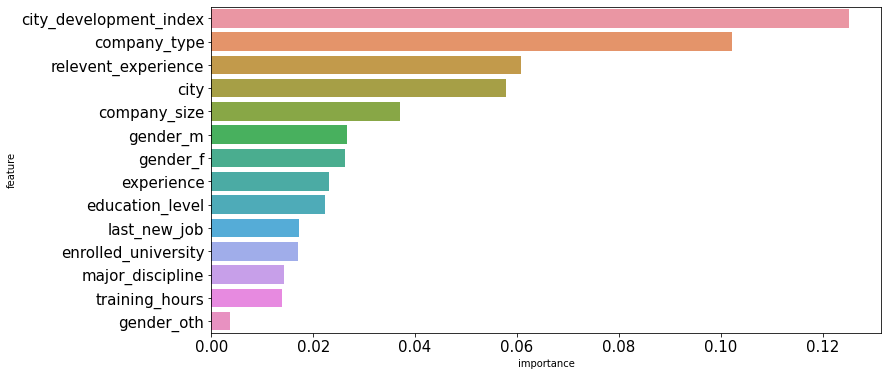

In [72]:
plt.figure(figsize = (12,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# We sort by importance and get the features
sb.barplot(x = 'importance', y = 'feature', data = feature_imp, 
            order = feature_imp.sort_values('importance', ascending=False).feature) ;

## 3.2 Perceptron

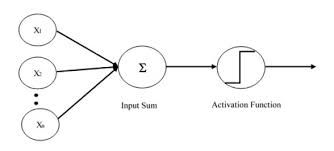


#### Random search

In [73]:
parameter_space = {
    
    'penalty':['l2','l1','elasticnet'],
    'alpha':np.arange(0,0.15,0.00001),
    'class_weight':[None]




   
}


per= Perceptron(random_state=42)
clf = RandomizedSearchCV(estimator=per,param_distributions=parameter_space)
bm = clf.fit(X_train,y_train)

In [74]:
print(bm.best_params_)

{'penalty': 'elasticnet', 'class_weight': None, 'alpha': 0.13663}


In [75]:
per = Perceptron(penalty='l2',random_state=42)
per.fit(X_train,y_train)

predict_train = per.predict(X_train)
y_pred = per.predict(X_test)

fscore_train = f1_score(y_train,predict_train)
fscore_test = f1_score(y_test,y_pred)
acc_train = accuracy_score(predict_train, y_train)
acc_test = accuracy_score(y_pred, y_test)


# Evaluation Metrics

In [76]:
print("RESULTS :")
print("F1 Train ",fscore_train)
print("F1 Test : ",fscore_test)
print('###############################')
print("Acc Train ",acc_train)
print("Acc Test : ",acc_test)
#print("Perceptron F1-score : ",round(fscore,2))
print(classification_report(y_test,y_pred))
print('\n')




RESULTS :
F1 Train  0.4761545508433475
F1 Test :  0.47051427134414686
###############################
Acc Train  0.5171608801470223
Acc Test :  0.5119944373623827
              precision    recall  f1-score   support

         0.0       0.51      0.59      0.55      4325
         1.0       0.51      0.43      0.47      4304

    accuracy                           0.51      8629
   macro avg       0.51      0.51      0.51      8629
weighted avg       0.51      0.51      0.51      8629





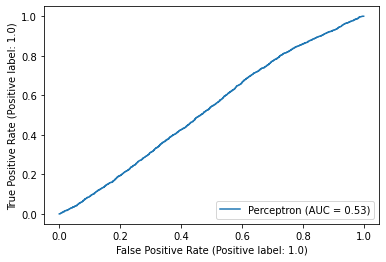

In [77]:
metrics.plot_roc_curve(per, X_test, y_test) 
plt.show()

[[2547 1778]
 [2433 1871]]


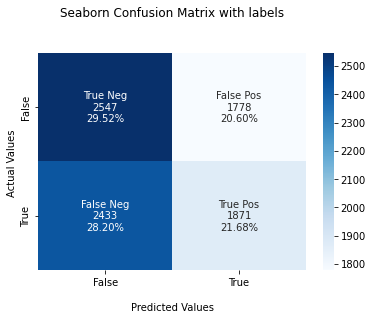

In [78]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Conclusion

- Data is Highly imbalanced
- There is High Cardinality in some categorical data
- Data is full of nulls that reach 30% in some columns
- Training hours is skewed right but in transformation it reduces the score.
- We Transformed the city development index which improve the score
- Handling outliers is not a good choice in this data
- The best way for filling the nulls is by using linear regression model
- Gender Column after celling and preform OHE acts better
- Binarizing ‘Company type’ and ‘Company size’ cause overfitting
- The correlation between independent variables and dependent variable is low
- Best technique to use in imbalance case is SMOTE.
- Standardization act better than min max scaler.
- Data is very hard to separate it linearly as shown in 3d plot.
- When MLP model became very complex it tends to be overfitting.

